<a href="https://colab.research.google.com/github/shweta7122/Sentiment-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis

**BUSINESS PROBLEM**

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. The company has engaged key influencers to talk about the new product and would like to measure their levels of engagement.


**ANALYTICAL OBJECTIVE**


The main bbjective is to extract data from the tweets from the key influencers and study their tweets and understand the polarity and subjectivity of the statements made by them and also how many references they have made to the business brand that is being promoted here.

In [190]:
# Importing our libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer


In [191]:
# Uploading the twitter api login information to be able to scrape data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (2).csv


In [192]:
# Getting data from the login file to login
log = pd.read_csv('Login.csv')

In [193]:
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [194]:
# Creating the authentication data
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [195]:
# Extract 100 tweets from the twitter user
screen_name = "pcmag"
posts = api.user_timeline(screen_name = screen_name, count = 5000, lang ='en', tweet_mode="extended")


# Print the last 10 tweets from the account
print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[0:10]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i+1

Show the 10 recent tweets: 

1) NVMe SSDs are the fastest internal storage drives you can buy today. https://t.co/MNKFc0kbdy

2) Circuit City finding out it's trending / Circuit City finding out why it's trending https://t.co/6LkuCH94tg

3) What's so special about USB-C? https://t.co/bj7dJokPpB

4) A hacker tried to take down a Microsoft customer's internet services with the second largest DDoS attack on record this past August.  https://t.co/gyCvAR1BK4

5) These devices will eliminate all the dead zones in your Wi-Fi network. https://t.co/YojG5Xc3mY

6) Samsung is launching an extremely fast SSD with a built-in heatsink to upgrade your PS5. https://t.co/u8o4IsExKD

7) Frustrated with the lack of disabled teen representation online, Emily Flores founded @CrippleMedia, the first Gen Z digital platform for, and created by, teens with disabilities. https://t.co/4OHFlLBmBJ

8) Fans of Left 4 Dead will be more than pleased with spiritual successor Back 4 Blood. https://t.co/dUwLYcyMTY

9) P

In [196]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head(10)

,Tweets
0,NVMe SSDs are the fastest internal storage dri...
1,Circuit City finding out it's trending / Circu...
2,What's so special about USB-C? https://t.co/bj...
3,A hacker tried to take down a Microsoft custom...
4,These devices will eliminate all the dead zone...
5,Samsung is launching an extremely fast SSD wit...
6,Frustrated with the lack of disabled teen repr...
7,Fans of Left 4 Dead will be more than pleased ...
8,Psst! allows you to share passwords with other...
9,If you don't have two-factor authentication ac...


**Text Preprocessing and Visuaizations**

Clearly, the tweets contain a lot of noisy data that needs to be removed before we move forward with the analysis. The data and symbols as "RT"/ @ etc needs to be removed

In [197]:
# Clean the text

# Create a function to clean the texts
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removed Hastags
  text = re.sub(r'RT[\s]+', '', text) #Removed RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removed hyperlinks

  return text


df['Tweets']=df['Tweets'].apply(cleanTxt)
df.head(10)

,Tweets
0,NVMe SSDs are the fastest internal storage dri...
1,Circuit City finding out it's trending / Circu...
2,What's so special about USB-C?
3,A hacker tried to take down a Microsoft custom...
4,These devices will eliminate all the dead zone...
5,Samsung is launching an extremely fast SSD wit...
6,Frustrated with the lack of disabled teen repr...
7,Fans of Left 4 Dead will be more than pleased ...
8,Psst! allows you to share passwords with other...
9,If you don't have two-factor authentication ac...


In [198]:
# Create a function to get the functionality
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe

df

,Tweets,Subjectivity,Polarity
0,NVMe SSDs are the fastest internal storage dri...,0.000000,0.000000
1,Circuit City finding out it's trending / Circu...,0.000000,0.000000
2,What's so special about USB-C?,0.571429,0.357143
3,A hacker tried to take down a Microsoft custom...,0.179630,-0.135185
4,These devices will eliminate all the dead zone...,0.400000,-0.200000
...,...,...,...
195,Among the many antivirus apps and security sui...,0.433333,0.666667
196,This in-shoe navigation system helps people wi...,0.400000,0.250000
197,Add these free games to your library before ti...,0.800000,0.400000
198,Stay cool wherever you go.,0.650000,0.350000


In [199]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

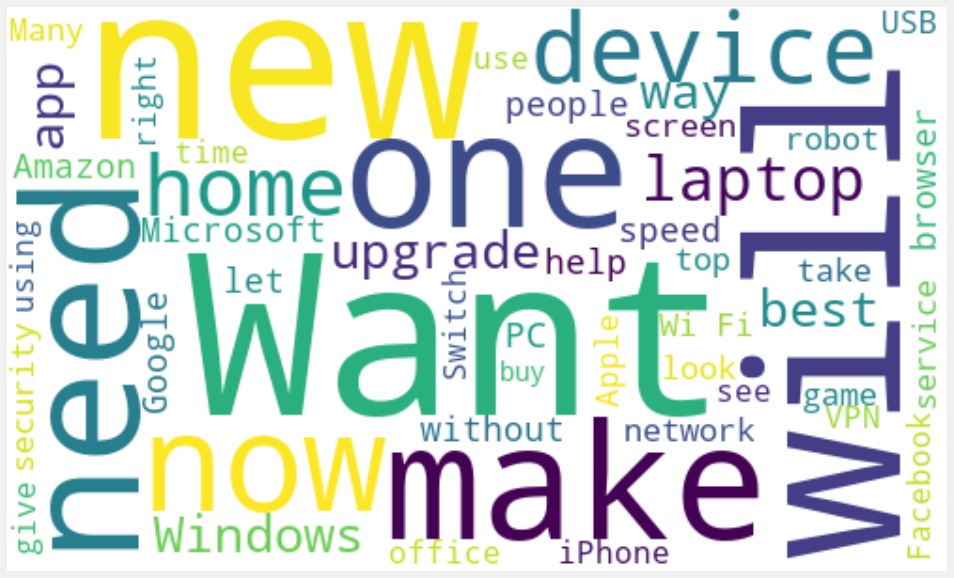

In [200]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordcloud = WordCloud(background_color='white', width=500, height=300, stopwords=stopwords,max_words=50, max_font_size=120, random_state=21).generate(allWords)

print(wordcloud)
fig = plt.figure(1, figsize=(15,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=100)

In [201]:
# Create a function to compute the sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,NVMe SSDs are the fastest internal storage dri...,0.000000,0.000000,Neutral
1,Circuit City finding out it's trending / Circu...,0.000000,0.000000,Neutral
2,What's so special about USB-C?,0.571429,0.357143,Positive
3,A hacker tried to take down a Microsoft custom...,0.179630,-0.135185,Negative
4,These devices will eliminate all the dead zone...,0.400000,-0.200000,Negative
...,...,...,...,...
195,Among the many antivirus apps and security sui...,0.433333,0.666667,Positive
196,This in-shoe navigation system helps people wi...,0.400000,0.250000,Positive
197,Add these free games to your library before ti...,0.800000,0.400000,Positive
198,Stay cool wherever you go.,0.650000,0.350000,Positive


In [202]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)What's so special about USB-C? 

2)Samsung is launching an extremely fast SSD with a built-in heatsink to upgrade your PS5. 

3)Fans of Left 4 Dead will be more than pleased with spiritual successor Back 4 Blood. 

4)Psst! allows you to share passwords with other people securely, even if they don't use 1Password. 

5)If you don't have two-factor authentication activated on your Google account, don't be surprised if the company does it for you.  

6)Google TV is finally catching on to what most streaming services have known for years: each person in a household has different tastes in entertainment.  

7)A pair of new Instagram features aim to keep users in the loop about app outages and account changes.  

8)While the Forza formula is starting to feel too familiar, the vibrant setting and adventurous spirit of ForzaHorizon5 make you want to stay in its lane. 

9)These days, education is more important to businesses than ever.  

10)Mirroring your iPhone screen is an easy process, as 

In [203]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending ='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)A hacker tried to take down a Microsoft customer's internet services with the second largest DDoS attack on record this past August.  

2)These devices will eliminate all the dead zones in your Wi-Fi network. 

3)Frustrated with the lack of disabled teen representation online, Emily Flores founded , the first Gen Z digital platform for, and created by, teens with disabilities. 

4)iCloud has long been Apple's online service for backing up, syncing, and sharing your online files.  

5)There are plenty of ways to let someone know you've thought of them without spending a small fortune. 

6)These VPNs won't drag down your internet speeds. 

7)Facebook has removed two networks linked to military organizations in Sudan and Iran that posed as fake news outlets and purchased followers in order to "praise the military and criticize opposing factions," the company says.  

8)Supply chain problems are starting to drag down growth in the PC market, particularly in North America.  

9)The Blue O

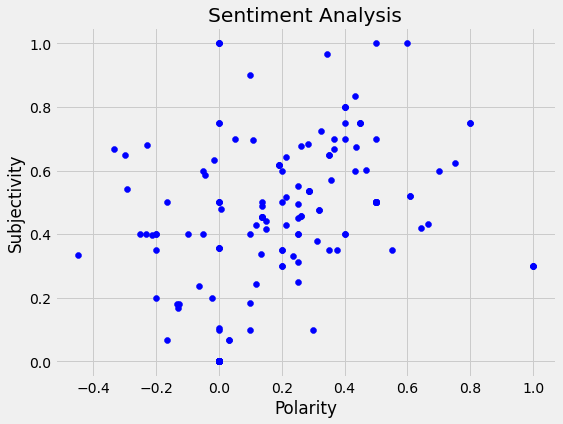

In [204]:
# Plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [205]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0]) *100, 1)

51.0

In [206]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0] / df.shape[0]) *100, 1)

12.0

<function matplotlib.pyplot.show>

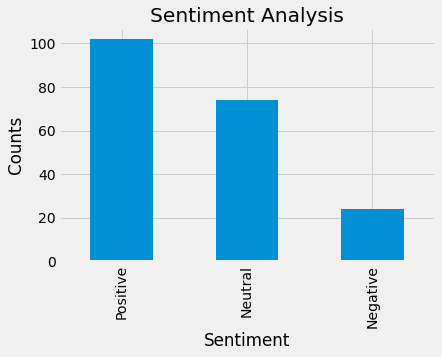

In [207]:
df['Analysis'].value_counts()

#plotand visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

In [208]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,NVMe SSDs are the fastest internal storage dri...,0.000000,0.000000,Neutral
1,Circuit City finding out it's trending / Circu...,0.000000,0.000000,Neutral
2,What's so special about USB-C?,0.571429,0.357143,Positive
3,A hacker tried to take down a Microsoft custom...,0.179630,-0.135185,Negative
4,These devices will eliminate all the dead zone...,0.400000,-0.200000,Negative
...,...,...,...,...
195,Among the many antivirus apps and security sui...,0.433333,0.666667,Positive
196,This in-shoe navigation system helps people wi...,0.400000,0.250000,Positive
197,Add these free games to your library before ti...,0.800000,0.400000,Positive
198,Stay cool wherever you go.,0.650000,0.350000,Positive


In [209]:
df.describe()

,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.348787,0.156324
std,0.288357,0.254068
min,0.000000,-0.450000
25%,0.000000,0.000000
50%,0.400000,0.033333
75%,0.535714,0.318182
max,1.000000,1.000000


**TOKENIZATION**

Tokenization is the process of converting text into tokens before transforming it into vectors. It is also easier to filter out unnecessary tokens. For example, a document into paragraphs or sentences into words. In this case we are tokenising the tweets into words

In [210]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r"\w+")

In [211]:
df['Tweets']=df['Tweets'].apply(str)
df['Tweets']=df['Tweets'].apply(regexp.tokenize)
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,"[NVMe, SSDs, are, the, fastest, internal, stor...",0.000000,0.000000,Neutral
1,"[Circuit, City, finding, out, it, s, trending,...",0.000000,0.000000,Neutral
2,"[What, s, so, special, about, USB, C]",0.571429,0.357143,Positive
3,"[A, hacker, tried, to, take, down, a, Microsof...",0.179630,-0.135185,Negative
4,"[These, devices, will, eliminate, all, the, de...",0.400000,-0.200000,Negative
5,"[Samsung, is, launching, an, extremely, fast, ...",0.600000,0.200000,Positive
6,"[Frustrated, with, the, lack, of, disabled, te...",0.166667,-0.130000,Negative
7,"[Fans, of, Left, 4, Dead, will, be, more, than...",0.338889,0.133333,Positive
8,"[Psst, allows, you, to, share, passwords, with...",0.487500,0.137500,Positive
9,"[If, you, don, t, have, two, factor, authentic...",0.900000,0.100000,Positive


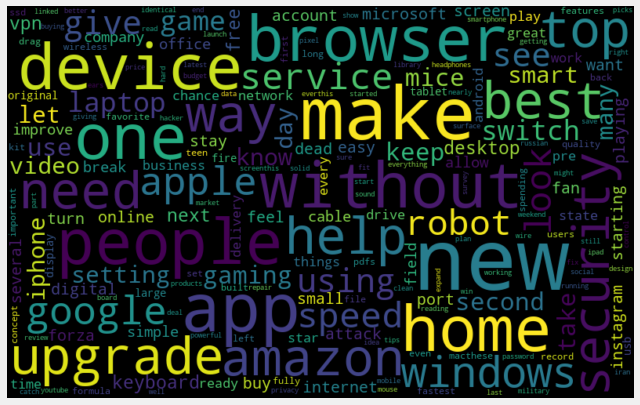

In [212]:
# Building a word cloud for the cleaned data
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [213]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
df['Tweets'] = df['Tweets'].apply(lambda x: [item for item in x if item not in list_stop_words])
df.head(10
        )


,Tweets,Subjectivity,Polarity,Analysis
0,"[NVMe, SSDs, fastest, internal, storage, drive...",0.000000,0.000000,Neutral
1,"[Circuit, City, finding, trending, Circuit, Ci...",0.000000,0.000000,Neutral
2,"[What, special, USB, C]",0.571429,0.357143,Positive
3,"[A, hacker, tried, take, Microsoft, customer, ...",0.179630,-0.135185,Negative
4,"[These, devices, eliminate, dead, zones, Wi, F...",0.400000,-0.200000,Negative
5,"[Samsung, launching, extremely, fast, SSD, bui...",0.600000,0.200000,Positive
6,"[Frustrated, lack, disabled, teen, representat...",0.166667,-0.130000,Negative
7,"[Fans, Left, 4, Dead, pleased, spiritual, succ...",0.338889,0.133333,Positive
8,"[Psst, allows, share, passwords, people, secur...",0.487500,0.137500,Positive
9,"[If, two, factor, authentication, activated, G...",0.900000,0.100000,Positive


In [215]:
# Removing small words (less than lenth 2 such as "it", "as", "no") and removing capital letters
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([w for w in x if len(w)>4]))
df['Tweets'] = df['Tweets'].str.lower()
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,fastest internal storage drives today,0.000000,0.000000,Neutral
1,circuit finding trending circuit finding trending,0.000000,0.000000,Neutral
2,special,0.571429,0.357143,Positive
3,hacker tried microsoft customer internet servi...,0.179630,-0.135185,Negative
4,these devices eliminate zones network,0.400000,-0.200000,Negative
5,samsung launching extremely built heatsink upg...,0.600000,0.200000,Positive
6,frustrated disabled representation online emil...,0.166667,-0.130000,Negative
7,pleased spiritual successor blood,0.338889,0.133333,Positive
8,allows share passwords people securely 1password,0.487500,0.137500,Positive
9,factor authentication activated google account...,0.900000,0.100000,Positive


In [216]:
from wordcloud import WordCloud
all_words = ''.join([word for word in df['Tweets']])
#printing some
all_words[0:500]

'fastest internal storage drives todaycircuit finding trending circuit finding trendingspecialhacker tried microsoft customer internet services second largest attack record augustthese devices eliminate zones networksamsung launching extremely built heatsink upgradefrustrated disabled representation online emily flores founded first digital platform created teens disabilitiespleased spiritual successor bloodallows share passwords people securely 1passwordfactor authentication activated google acc'

**STEMMING AND LEMMATIZATION**

The next step is to use stemming or lemmatization methods and is very important for any text mining problem. Stemming and Lemmatization are Text Normalization  techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. This is done to build common words for the words with similar root and context which makes it easier to model using classification algorithms. Like for example, play, playing and played all mean the same but are different words.

In [217]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_tokenizer = WordNetLemmatizer()
df['Tweets'] = df['Tweets'].apply(wordnet_tokenizer.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


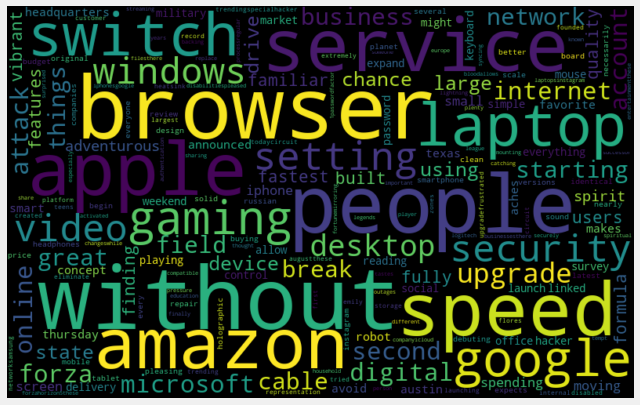

In [218]:
all_words = ''.join([word for word in df['Tweets']])
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We see that cleaned data gives a better picture of the trending topics after the noise has been cleared out and the important topics emerge more clearly

In [219]:
pos = df[df['Analysis'] == 'Positive']
neg = df[df['Analysis'] == 'Negative']
pos_sentiment_words = ''.join([word for word in pos['Tweets']])   #words from the tweets that are positive
neg_sentiment_words = ''.join([word for word in neg['Tweets']])   ##words from the tweets that are negative

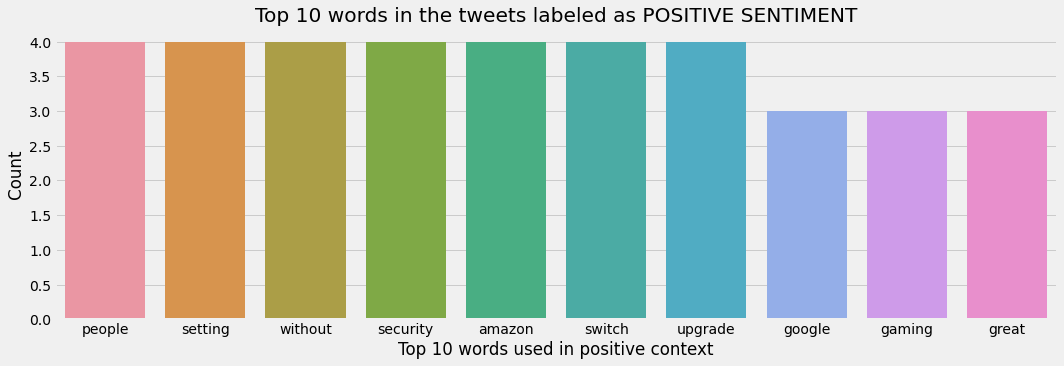

In [222]:
list_pos_words = [ x for x in pos_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_pos_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count
# selecting top 10 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 10 words used in positive context')
plt.title("Top 10 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()

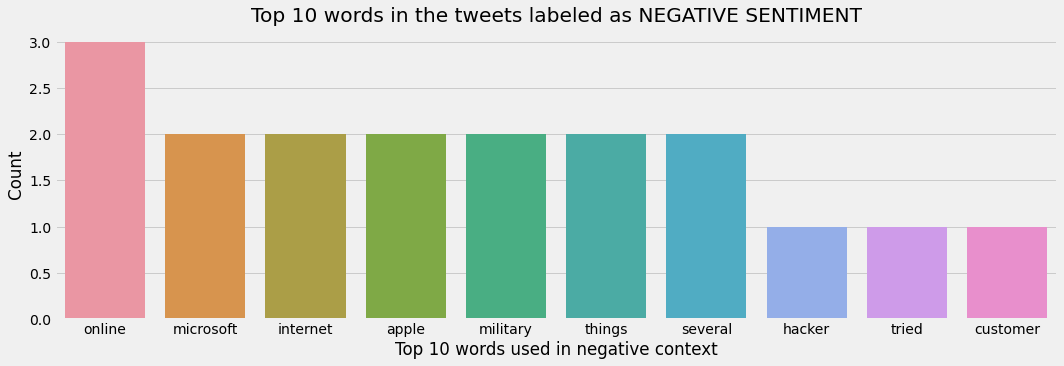

In [224]:
list_neg_words = [ x for x in neg_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_neg_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count
# selecting top 10 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 10 words used in negative context')
plt.title("Top 10 words in the tweets labeled as NEGATIVE SENTIMENT")

plt.show()

**SO WHAT?**


The sentiment analysis gives the company a clear picture of the handles of key influencers on twitter and what is being talked about at a particular product or brand. Alternatively data can be scraped about a given topic or hashtag which may provide context.


**CONCLUSION**

We followed several steps to get the twitter sentiment analysis by handle which sufficiently solves the business problem and also satisfies the analytical objective. We acheived this by pre-processing data to get cleaner data. We used several techniques such as visualization, tokenization, removing stopwords, lemmatization and normalization of the the text to achieve this.

**MODEL IMPROVEMENT:**

Though the project sufficiently satisfies the requirements, we can tune it further by extending it to other languages, having more sophisticated text cleaning methods to further improve the results. We can also train the data with different models and performing bootstrapping, cross validation and additional visualizations.

# New Section